# ⭐ Prevendo nota do Anime

Com o objetivo de aprender a transformação one-hot e a usar o modelo knn, importemos um dataset de animes com nome, genero, tipo, episodios, notas e membros. Usaremos o one-hot para genero e tipo e tentaremos prever a nota do anime.

In [99]:
import pandas as pd
#Transformando o arquivo em dataframe e filtrando para tirar o anime_id
df = pd.read_csv('anime.csv')
df = df.iloc[0:, 1:]
#Retirando elementos com episodes ou members vazio e transformando esses dados em int
df = df.dropna()
df = df[df['episodes'] != 'Unknown']
df['episodes'] = df['episodes'].astype(int)
df = df[df['members'] != 'Unknown']
df['members'] = df['members'].astype(int)
df

,name,genre,type,episodes,rating,members
0,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266
...,...,...,...,...,...,...
12289,Toushindai My Lover: Minami tai Mecha-Minami,Hentai,OVA,1,4.15,211
12290,Under World,Hentai,OVA,1,4.28,183
12291,Violence Gekiga David no Hoshi,Hentai,OVA,4,4.88,219
12292,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA,1,4.98,175


Para que o algoritmo knn tenha melhor desempenho, é necessário normalizar os dados numéricos. Assim, usarei StandardScaler para normalizar episodes e members.

In [100]:
from sklearn.preprocessing import StandardScaler

x= df["episodes"].values.reshape(-1,1)
normalizador = StandardScaler()
normalizador.fit(x)
ep_norm = normalizador.transform(x)
df['episodes'] = ep_norm

x = df['members'].values.reshape(-1,1)
normalizador = StandardScaler()
normalizador.fit(x)
memb_norm = normalizador.transform(x)
df['members'] = memb_norm

df

,name,genre,type,episodes,rating,members
0,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,-0.243905,9.37,3.289181
1,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,1.093813,9.26,13.999758
2,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,0.817776,9.25,1.729322
3,Steins;Gate,"Sci-Fi, Thriller",TV,0.244468,9.17,11.830805
4,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,0.817776,9.16,2.397637
...,...,...,...,...,...,...
12289,Toushindai My Lover: Minami tai Mecha-Minami,Hentai,OVA,-0.243905,4.15,-0.330509
12290,Under World,Hentai,OVA,-0.243905,4.28,-0.331015
12291,Violence Gekiga David no Hoshi,Hentai,OVA,-0.180204,4.88,-0.330365
12292,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA,-0.243905,4.98,-0.331159


O knn necessita de traduzir os dados categóricos em binário para melhor desempenho. Usarei o OneHot para tratar o tipo e usarei MultiLabelBinarizer para tratar gêneros.

In [101]:
from sklearn.preprocessing import MultiLabelBinarizer, OneHotEncoder
#Dividir os genre em gêneros separados
df["genre"] = df["genre"].fillna("").apply(lambda x: [g.strip() for g in x.split(",")])
#Aplicar multi label binarizer em genre
mlb = MultiLabelBinarizer()
genre_encoded = mlb.fit_transform(df["genre"])
df_genres = pd.DataFrame(genre_encoded, columns=mlb.classes_, index=df.index)

#Aplicar One Hot Encoder em type
encoder = OneHotEncoder(sparse_output=False)
type_encoded = encoder.fit_transform(df[["type"]])
df_type = pd.DataFrame(type_encoded, columns=encoder.get_feature_names_out(["type"]), index=df.index)

#Concatenar os resultados em um df novo
df = pd.concat([df.drop(columns=["genre", "type"]), df_genres, df_type], axis=1)
df

,name,episodes,rating,members,Action,Adventure,Cars,Comedy,Dementia,Demons,...,Thriller,Vampire,Yaoi,Yuri,type_Movie,type_Music,type_ONA,type_OVA,type_Special,type_TV
0,Kimi no Na wa.,-0.243905,9.37,3.289181,0,0,0,0,0,0,...,0,0,0,0,1.0,0.0,0.0,0.0,0.0,0.0
1,Fullmetal Alchemist: Brotherhood,1.093813,9.26,13.999758,1,1,0,0,0,0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
2,Gintama°,0.817776,9.25,1.729322,1,0,0,1,0,0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
3,Steins;Gate,0.244468,9.17,11.830805,0,0,0,0,0,0,...,1,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
4,Gintama&#039;,0.817776,9.16,2.397637,1,0,0,1,0,0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12289,Toushindai My Lover: Minami tai Mecha-Minami,-0.243905,4.15,-0.330509,0,0,0,0,0,0,...,0,0,0,0,0.0,0.0,0.0,1.0,0.0,0.0
12290,Under World,-0.243905,4.28,-0.331015,0,0,0,0,0,0,...,0,0,0,0,0.0,0.0,0.0,1.0,0.0,0.0
12291,Violence Gekiga David no Hoshi,-0.180204,4.88,-0.330365,0,0,0,0,0,0,...,0,0,0,0,0.0,0.0,0.0,1.0,0.0,0.0
12292,Violence Gekiga Shin David no Hoshi: Inma Dens...,-0.243905,4.98,-0.331159,0,0,0,0,0,0,...,0,0,0,0,0.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
Agora, treinarei o modelo KNN.

In [102]:
from sklearn.model_selection import train_test_split
TAMANHO_TESTE = 0.1
SEMENTE_ALEATORIA = 27

indices = df.index
indices_treino, indices_teste = train_test_split(
    indices, test_size=TAMANHO_TESTE, random_state=SEMENTE_ALEATORIA
)

df_treino = df.loc[indices_treino]
df_teste = df.loc[indices_teste]

In [103]:
ATRIBUTOS = list(df.columns)
ATRIBUTOS.remove('name')
ATRIBUTOS.remove('rating')
TARGET = ['rating']
X_treino = df_treino.reindex(ATRIBUTOS, axis=1)
y_treino = df_treino.reindex(TARGET, axis=1)

X_teste = df_teste.reindex(ATRIBUTOS, axis=1)
y_teste = df_teste.reindex(TARGET, axis=1)

In [111]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error

NUM_VIZINHOS = 3
modelo_knn = KNeighborsRegressor(n_neighbors=NUM_VIZINHOS)

modelo_knn.fit(X_treino, y_treino)

from sklearn.metrics import root_mean_squared_error

X_verdadeiro = X_teste
y_verdadeiro = y_teste

y_previsto = modelo_knn.predict(X_verdadeiro)

RMSE = root_mean_squared_error(y_verdadeiro, y_previsto)
mae = mean_absolute_error(y_verdadeiro, y_previsto)

print(f"O RMSE do modelo foi de {RMSE} unidades de y.")
print(f"Erro médio absoluto: {mae:.2f} pontos")

O RMSE do modelo foi de 0.7904998341492474 unidades de y.
Erro médio absoluto: 0.57 pontos


Percebe-se que o RMSE foi de 0.79 e MAE foi de 0.57. O modelo conseguiu um ótimo resultado, prevendo com um erro aceitável a nota do anime, pois varia de 0 a 10. Assim, usando-se dos gêneros, popularidade, tipo e número de episódios, pode-se ter uma boa noção do quão bom é o anime.

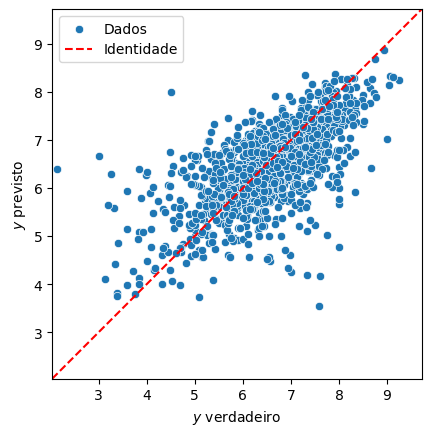

In [106]:
import seaborn as sns

y_real = y_verdadeiro.values.ravel()
y_prev = y_previsto.ravel()

min_val = min(y_real.min(), y_prev.min())
max_val = max(y_real.max(), y_prev.max())

intervalo = [min_val * 0.95, max_val * 1.05]

eixo = sns.scatterplot(x=y_real, y=y_prev, label="Dados")
eixo.plot(intervalo, intervalo, "r--", label="Identidade")

eixo.set(
    xlabel="$y$ verdadeiro",
    ylabel="$y$ previsto",
    xlim=intervalo,
    ylim=intervalo,
    aspect="equal",
)
eixo.legend();

O gráfico confirma o que foi discutido, percebendo-se que o algoritmo conseguiu fazer uma ótima aproximação para os ratings dos animes.

### Conclusão
Portanto, as transformações (normalização, one hot e multi label binalizer) resultaram em um dataframe que, usando o algoritmo KNN, conseguiu ótima previsão dos ratings dos animes. Isso mostrou tanto a grande eficácia das transformações quanto o surpreendente poder do macine learning, que conseguiu prever algo que depende dos pensamentos dos indivíduos se baseando em fatos. Assim, é possível por esse método ajudar as editoras a escolherem obras com maior chance de fazerem sucesso.

### Referências

Cassar, Daniel. LMA-203 1.0 - Tratamento de dados com pandas. Acesso em: 24 ago. 2025.

Cassar, Daniel. LMA-203 2.0 - Aprendizado de máquina. Acesso em: 24 ago. 2025.

Cassar, Daniel. LMA-203 2.1 - Divisão de dados de treino e teste. Acesso em: 24 ago. 2025.

Muzdadid, Hasib Al. Anime Ratings. Disponível em: https://www.kaggle.com/code/hasibalmuzdadid/anime-ratings-analysis-recommender-system/notebook. Acesso em: 24 ago. 2025.